In [20]:
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Scikit-learn and related libraries for machine learning
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier


In [ ]:
# Loading the data set
# source of data - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)  # Used to see whole columns
pd.set_option('display.width', None)  # Adjust to fit the display



In [23]:
# Data Inspection
print(f'Shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')


Shape of the dataset is 284807 rows and 31 columns


In [24]:
(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
 # Check for null values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [27]:
# Checking duplicates in the data set

print(df.duplicated().any())

# We can observe duplicates in the data set ,let remove them and check

# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

True


(283726, 31)

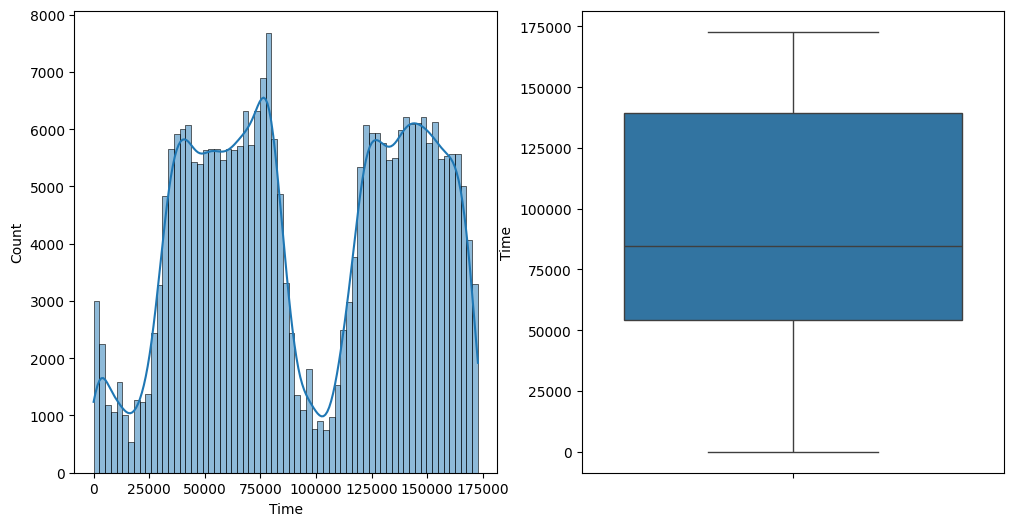

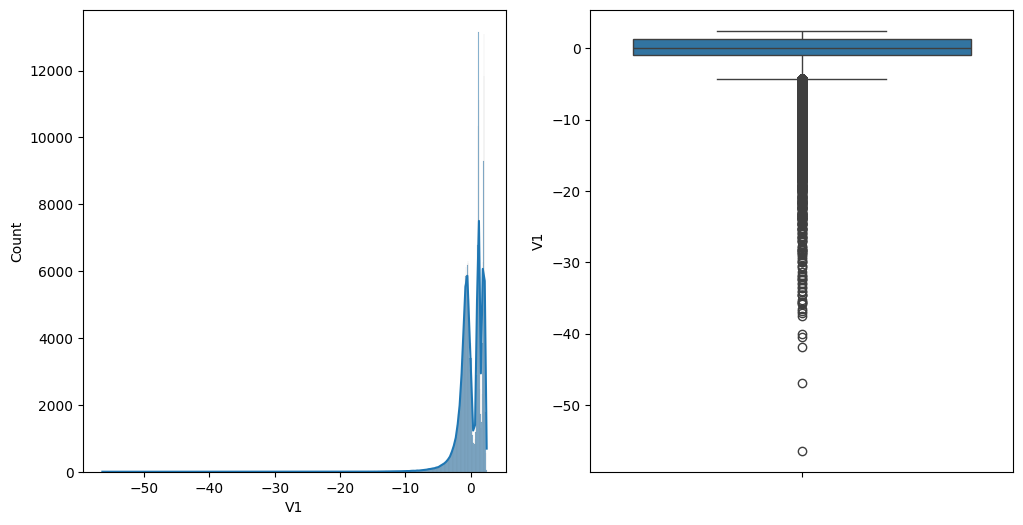

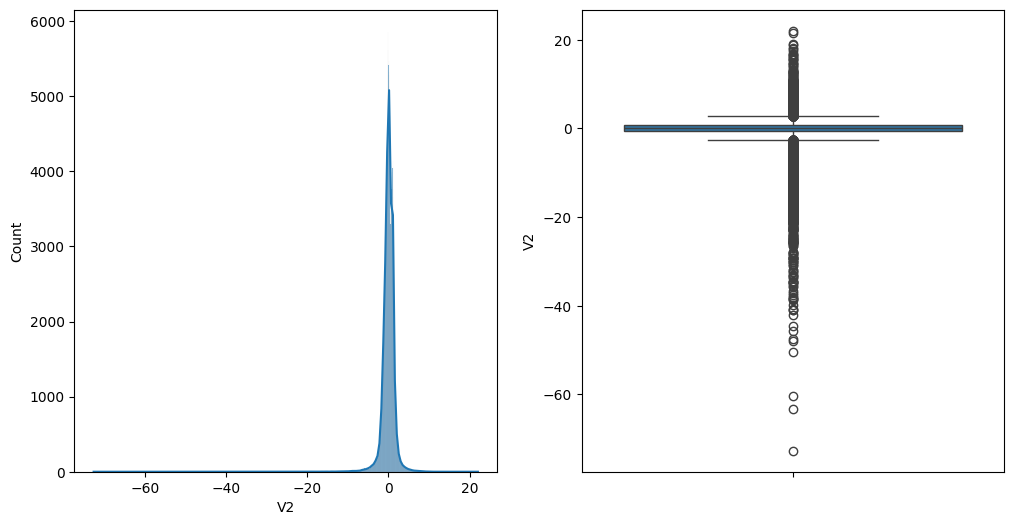

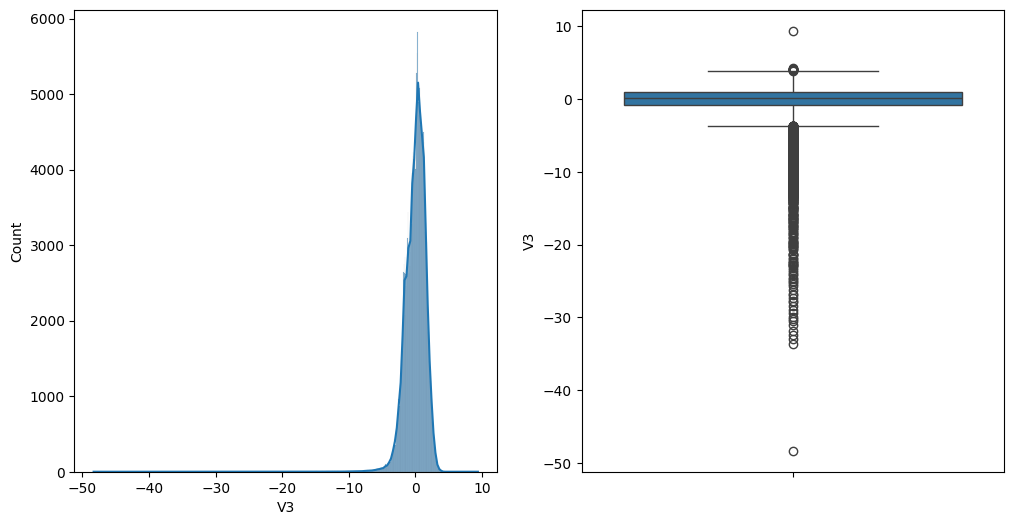

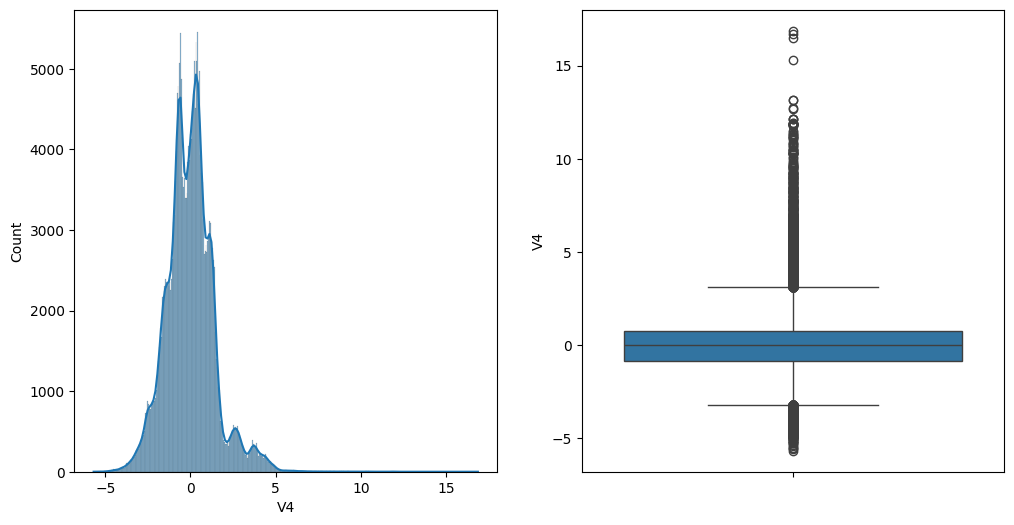

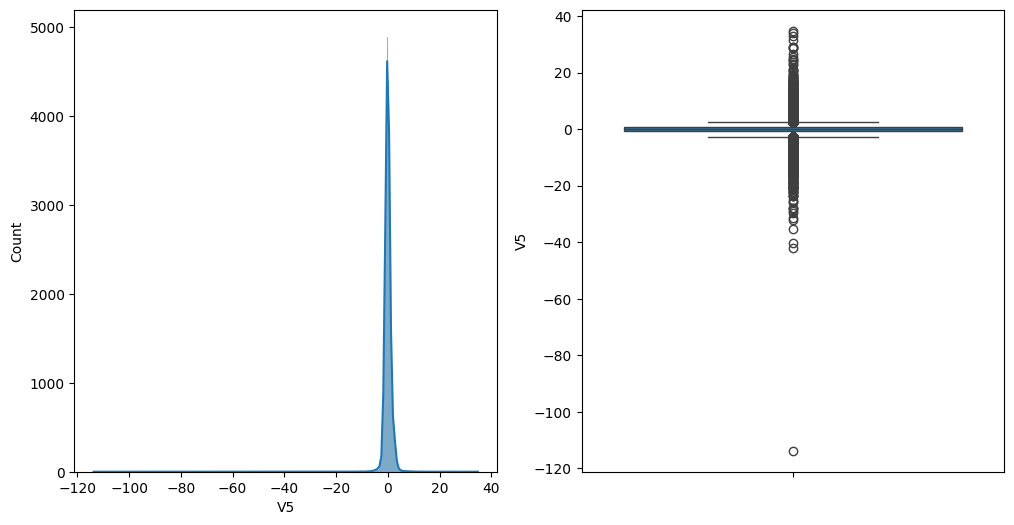

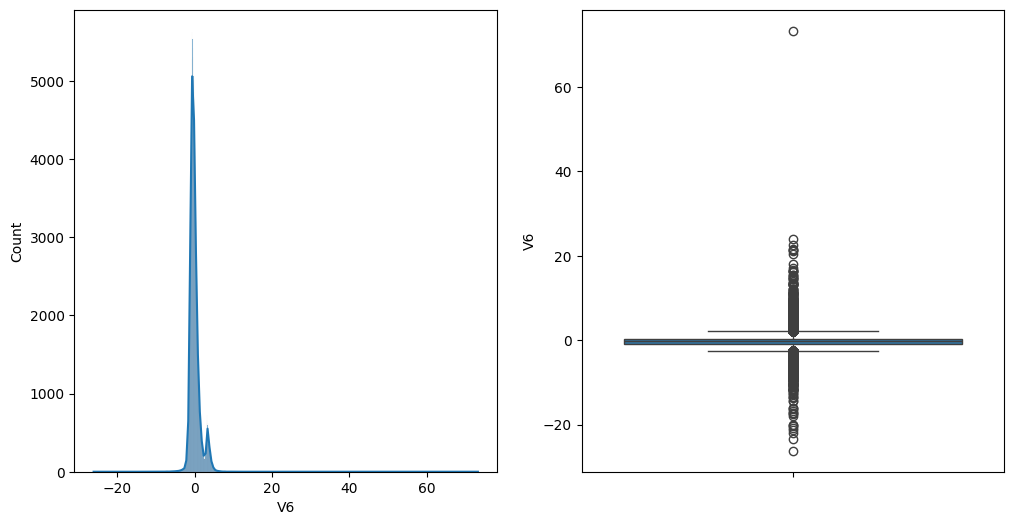

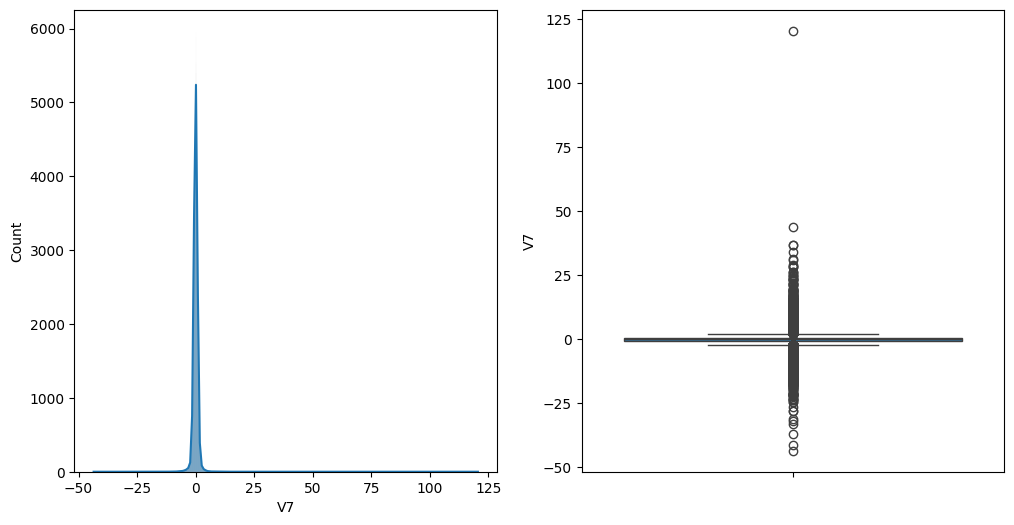

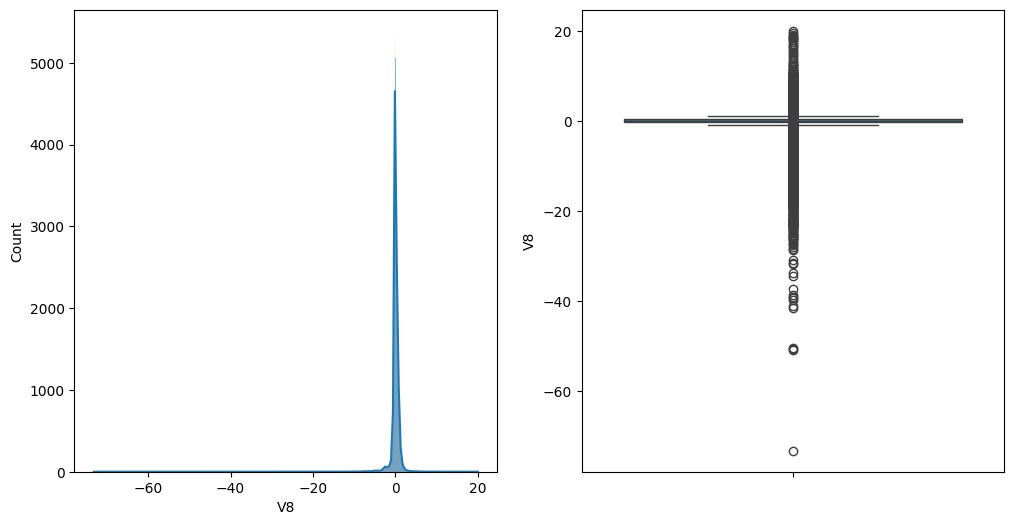

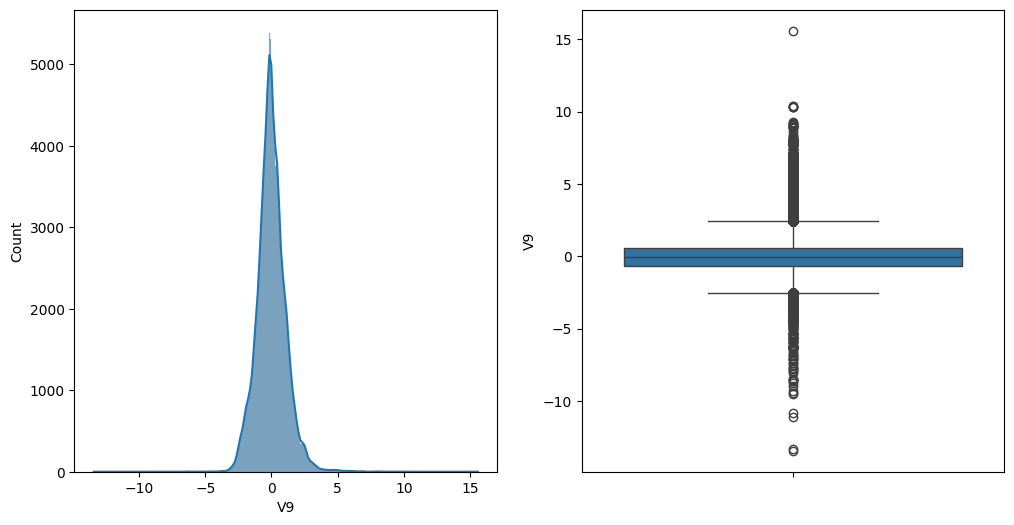

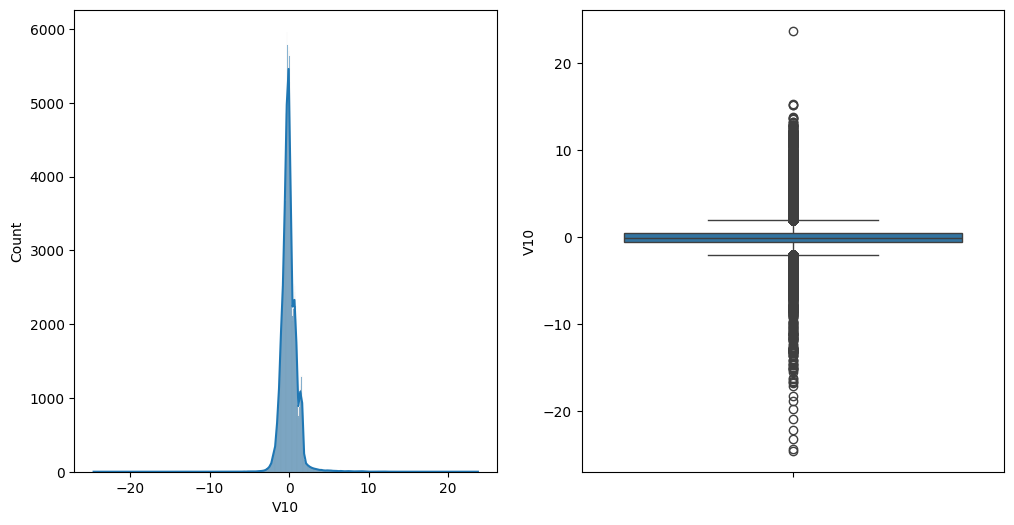

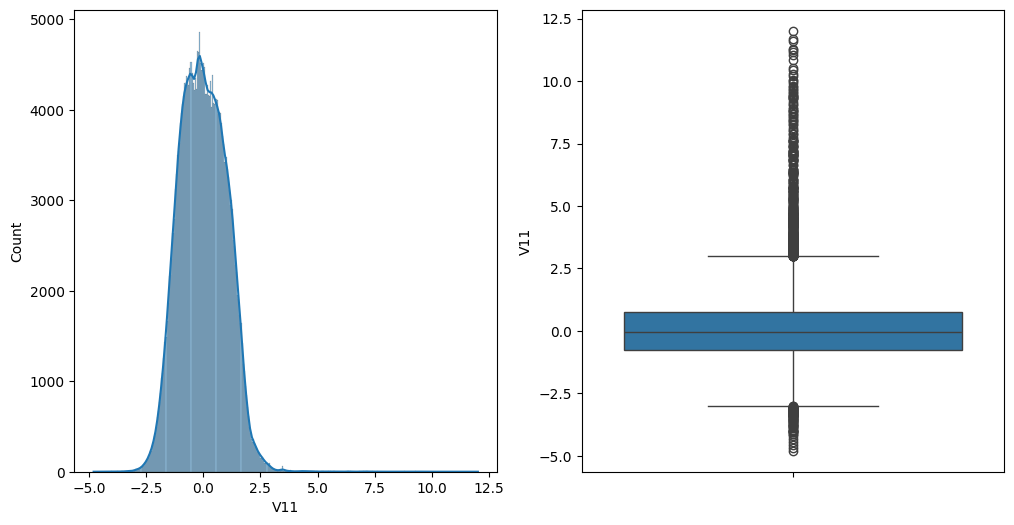

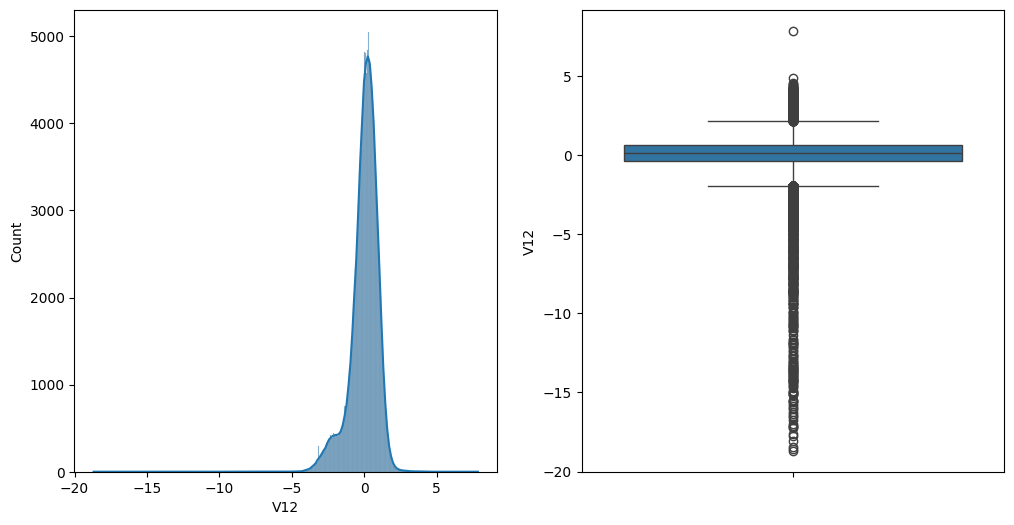

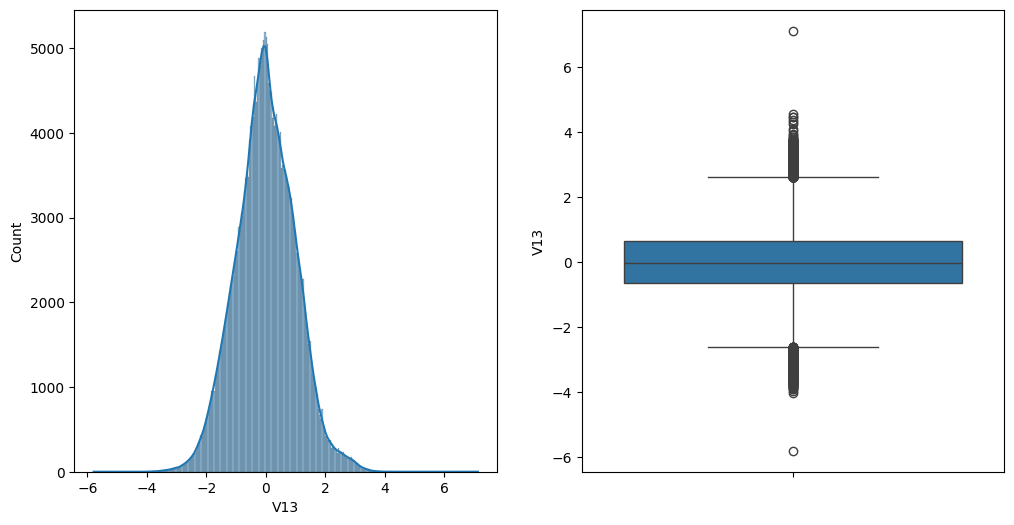

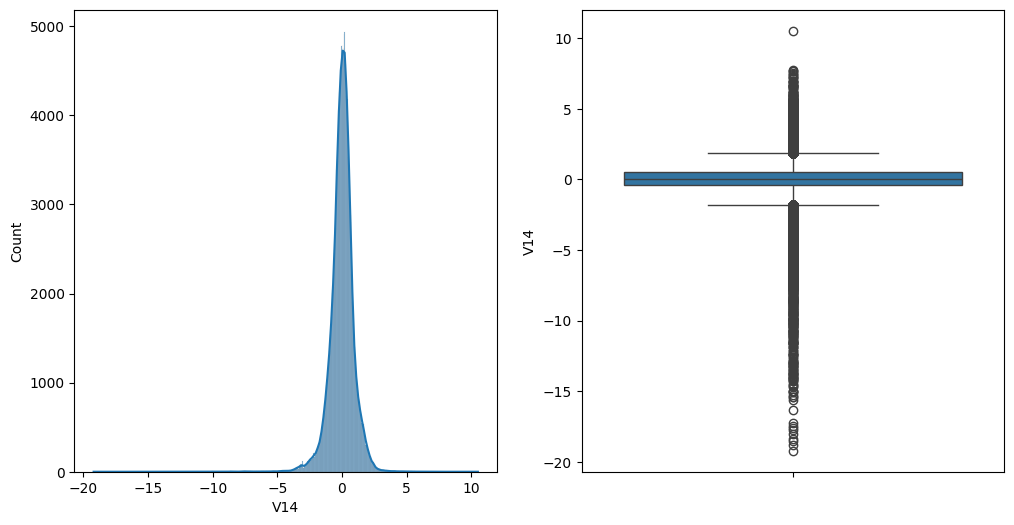

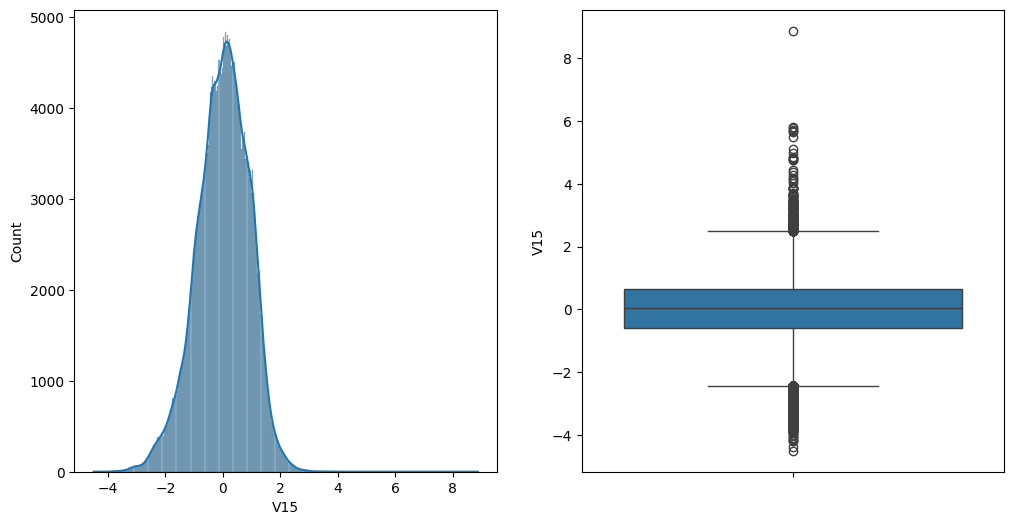

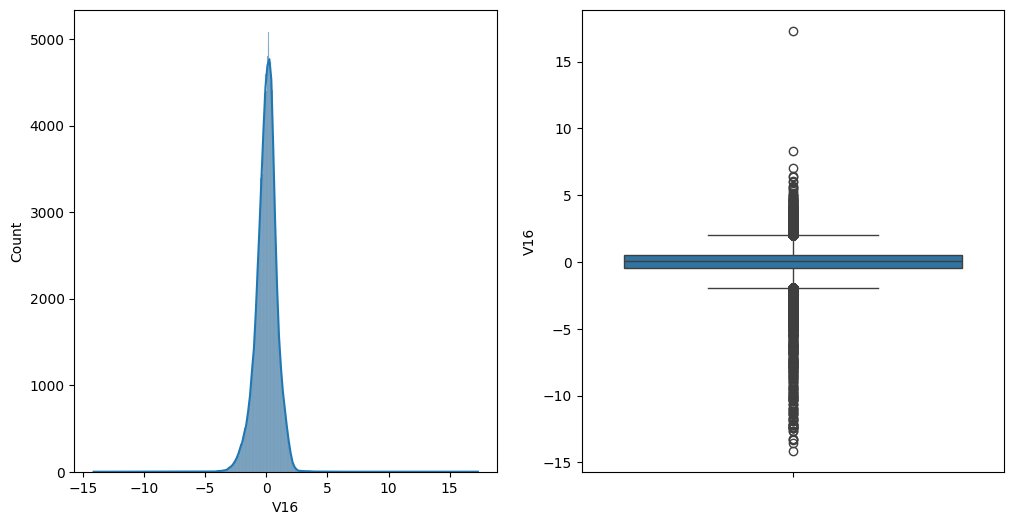

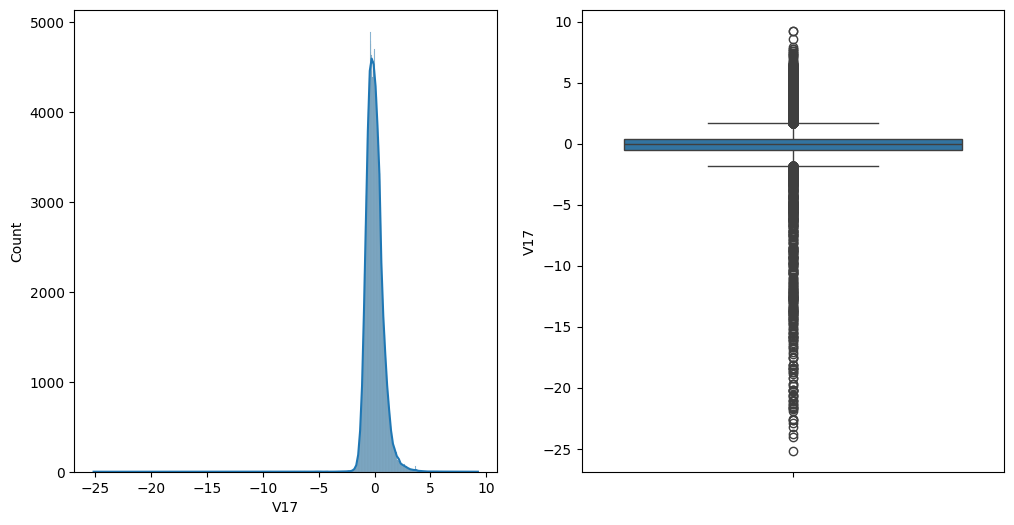

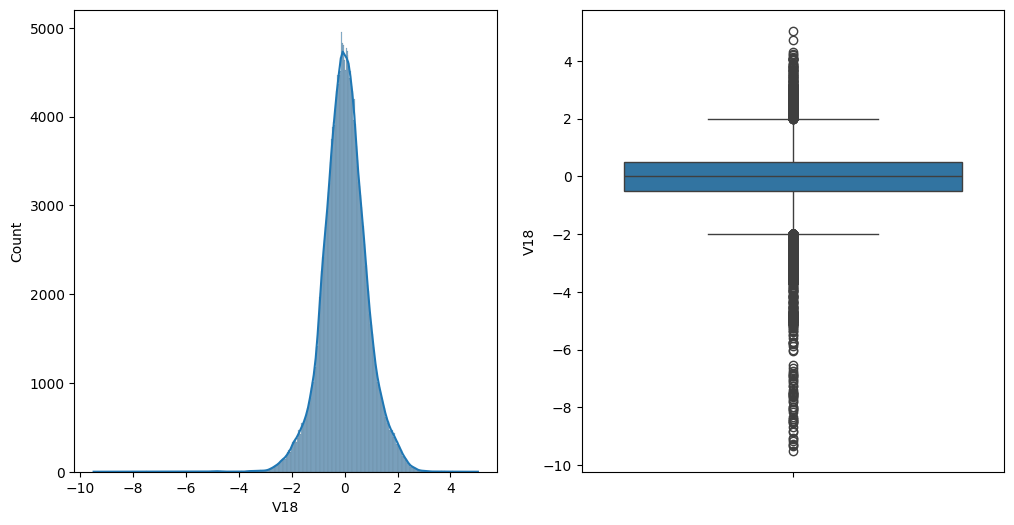

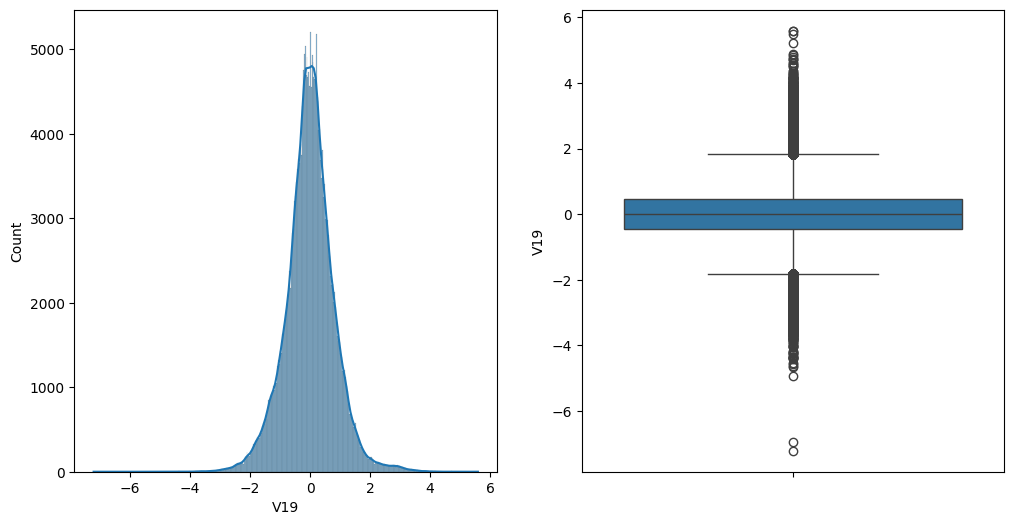

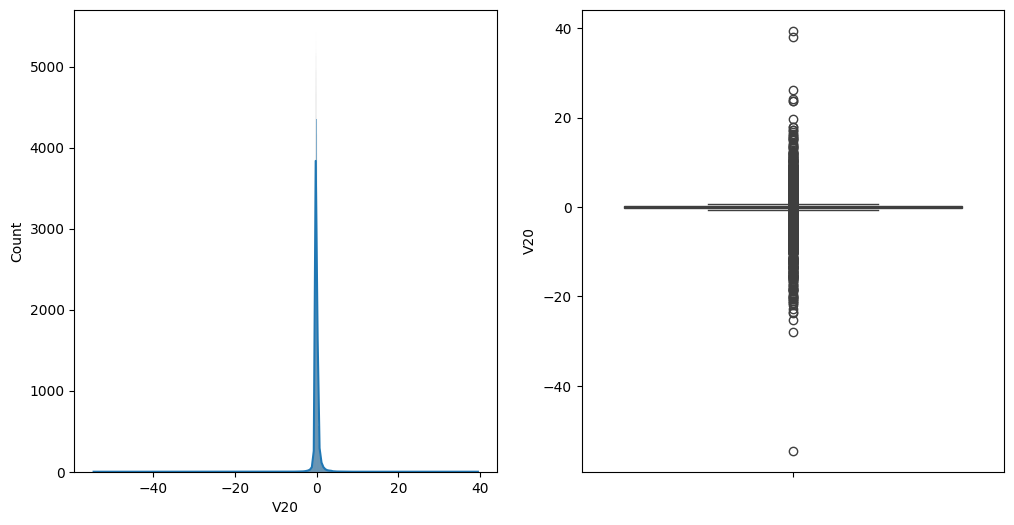

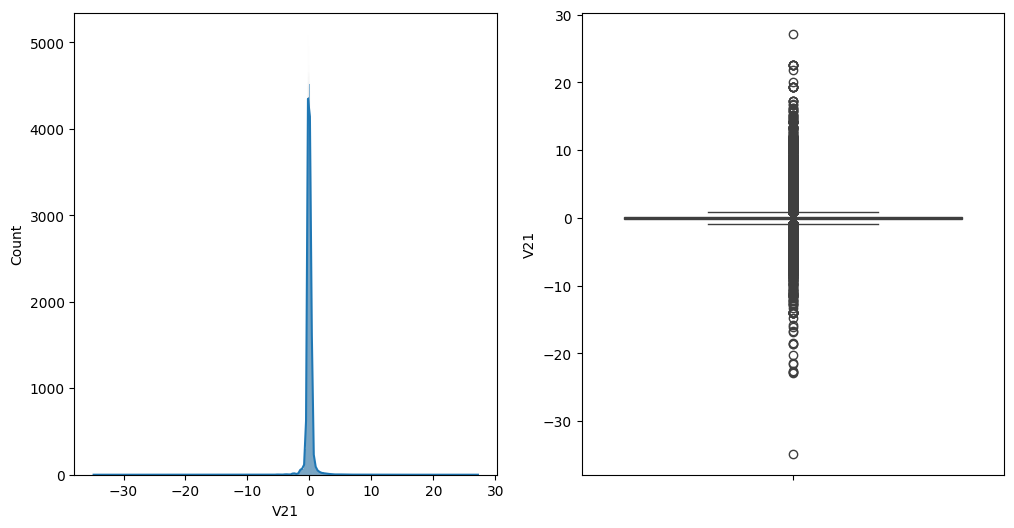

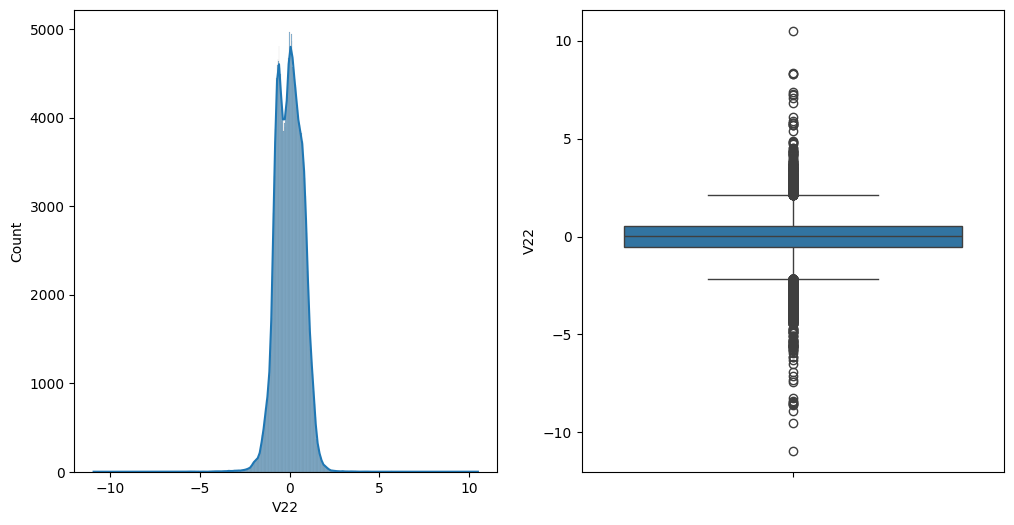

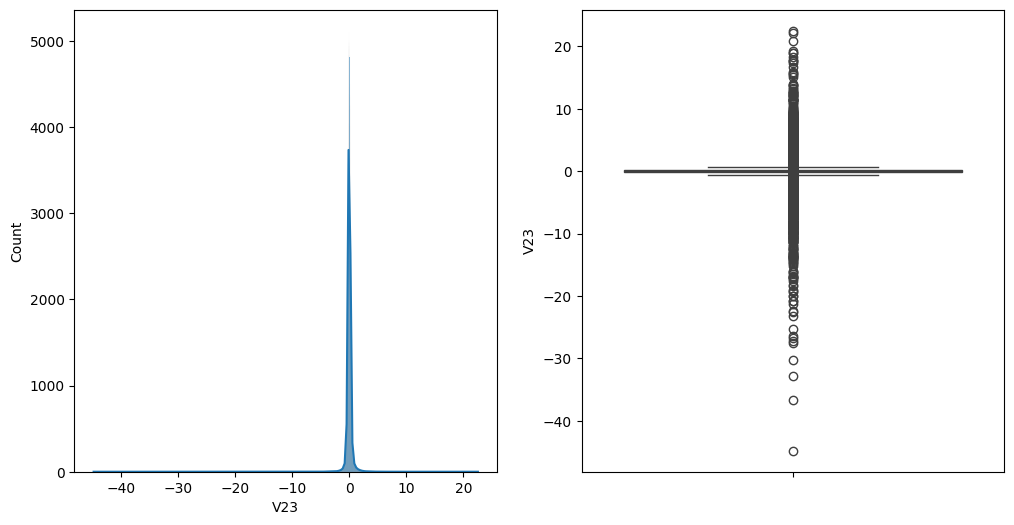

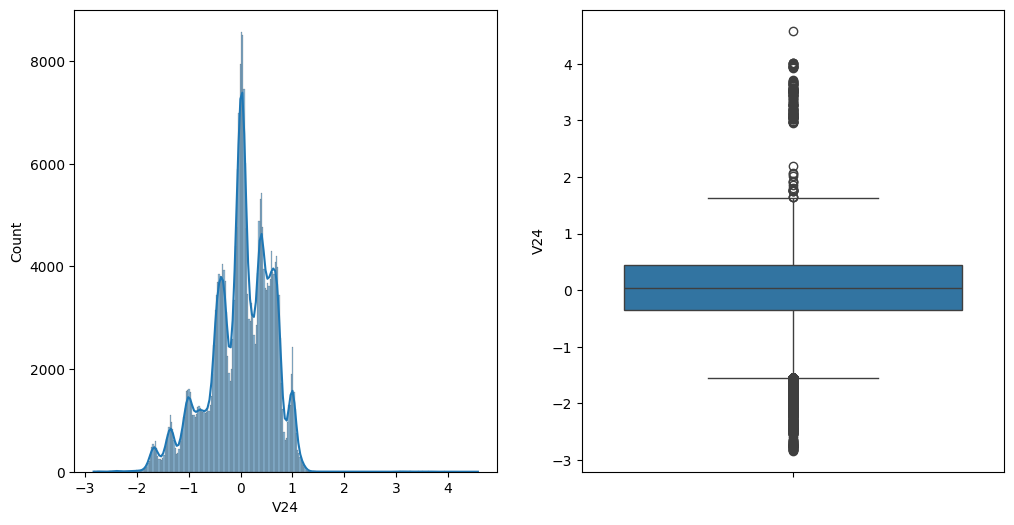

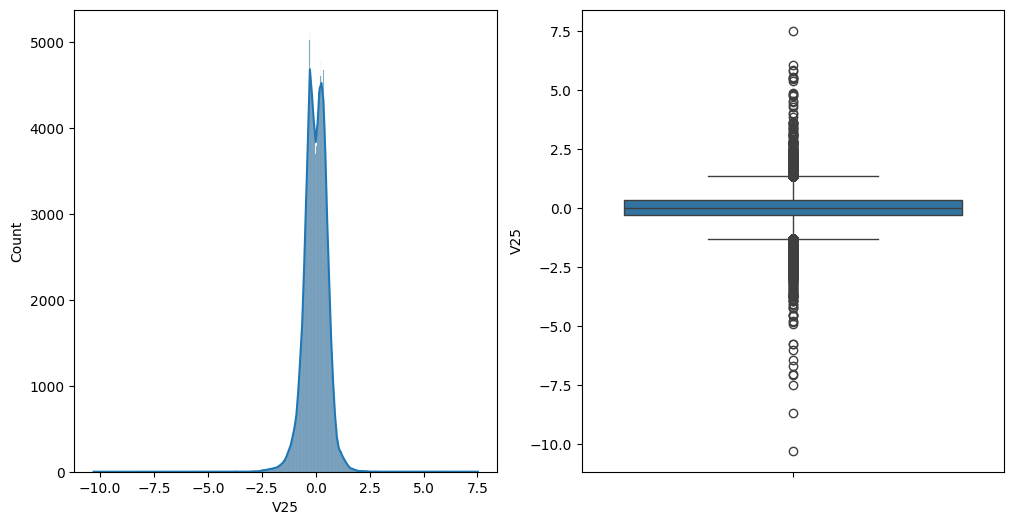

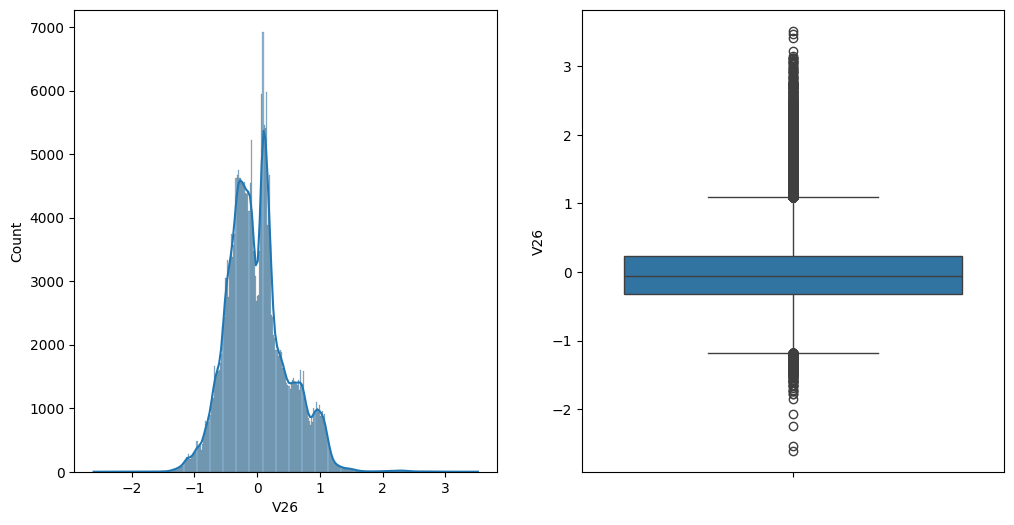

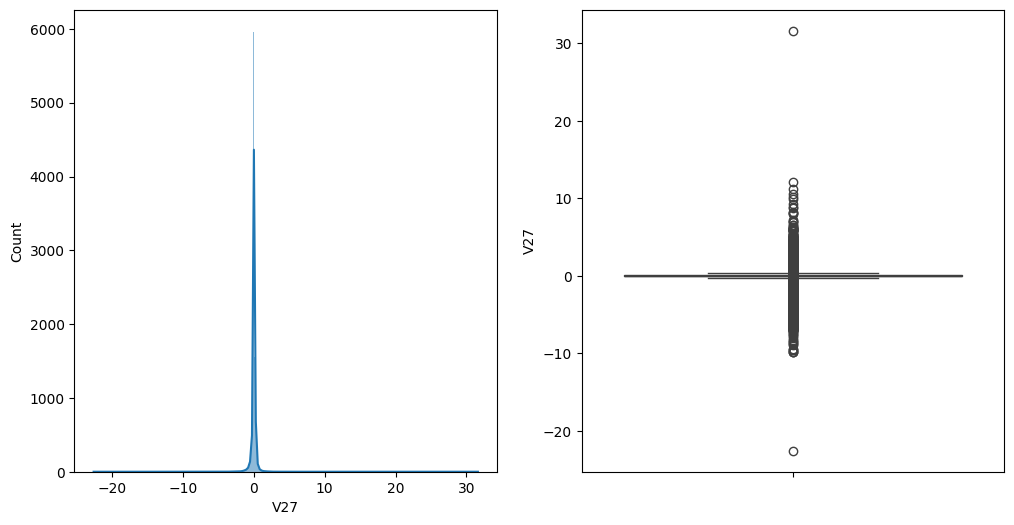

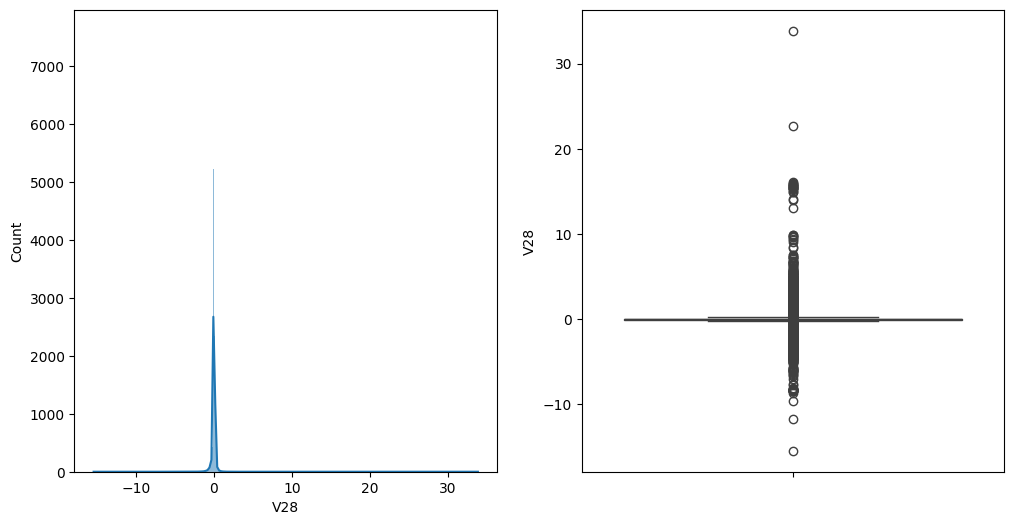

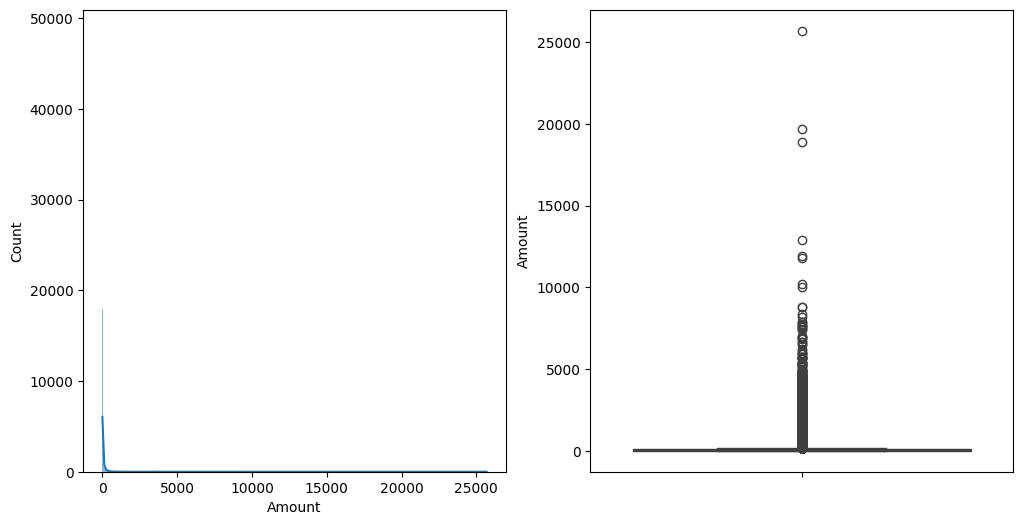

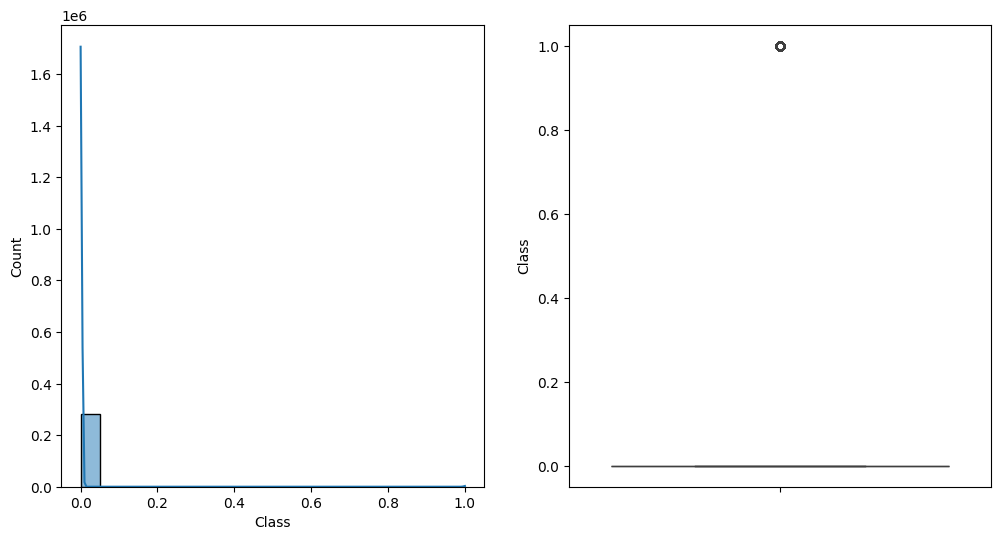

In [28]:
# Outliers check (Visual inspection)
data = df.select_dtypes(exclude="object")
col = data.columns

for i in col:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(data[i], kde=True)
    plt.subplot(122)
    sns.boxplot(data[i])
    plt.show()


*  Not removing the outliers in transactional data , as it may lead to loss of pattern of fraud transaction, as there is no clarity based on columns

* Using log transformation to scale down and reducing skewness


In [29]:
# Apply log transformation to reduce skewness
columns_to_log_transform = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]

def sign_log_transform(x):
    if x > 0:
        return np.log1p(x)
    elif x < 0:
        return -np.log1p(abs(x))
    else:
        return 0  # Leave zero values as is

df[columns_to_log_transform] = df[columns_to_log_transform].applymap(sign_log_transform)


<ipython-input-29-853867dc3529>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_log_transform] = df[columns_to_log_transform].applymap(sign_log_transform)


In [30]:
# Logistic Regression Model
# Separating out the independent and dependent variables
X = df.drop('Class', axis=1)
y = df['Class']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression results
log_reg_scores = []
log_reg_recall_scores = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Apply class weight to balance the classes
    log_reg.fit(X_train_resampled, y_train_resampled)

    # Validate the model
    val_preds = log_reg.predict(X_val)
    val_roc_auc = roc_auc_score(y_val, val_preds)
    val_recall = recall_score(y_val, val_preds)

    log_reg_scores.append(val_roc_auc)
    log_reg_recall_scores.append(val_recall)

print("Logistic Regression CV ROC AUC Scores:", log_reg_scores)
print("Mean CV ROC AUC for Logistic Regression:", np.mean(log_reg_scores))
print("Logistic Regression CV Recall Scores:", log_reg_recall_scores)
print("Mean CV Recall for Logistic Regression:", np.mean(log_reg_recall_scores))


Logistic Regression CV ROC AUC Scores: [0.9366918779712162, 0.9368146024351414, 0.9481501519005693, 0.9373712082501046, 0.9468825196265156]
Mean CV ROC AUC for Logistic Regression: 0.9411820720367092
Logistic Regression CV Recall Scores: [0.9052631578947369, 0.9042553191489362, 0.925531914893617, 0.9052631578947369, 0.9263157894736842]
Mean CV Recall for Logistic Regression: 0.9133258678611422


In [31]:
# Evaluate Logistic Regression on the entire dataset
final_log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
final_log_reg.fit(X_scaled, y)
final_preds = final_log_reg.predict(X_scaled)

print("\nLogistic Regression Overall Accuracy:", accuracy_score(y, final_preds))
print("Logistic Regression Overall ROC AUC Score:", roc_auc_score(y, final_preds))
print("Logistic Regression Overall Recall Score:", recall_score(y, final_preds))
print("Confusion Matrix for Logistic Regression Overall:")
print(confusion_matrix(y, final_preds))



Logistic Regression Overall Accuracy: 0.9712257600642874
Logistic Regression Overall ROC AUC Score: 0.9465421170888032
Logistic Regression Overall Recall Score: 0.9217758985200846
Confusion Matrix for Logistic Regression Overall:
[[275126   8127]
 [    37    436]]


In [32]:
# Random Forest Model
# Splitting the dataset into Training and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Hyperparameter tuning for Random Forest using GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'class_weight': ['balanced', None]  # Use class weight to address imbalance
}
grid_search = GridSearchCV(random_forest, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, Y_train)

# Best parameters and model from GridSearchCV
print("Best Parameters for Random Forest:", grid_search.best_params_)
classifier = grid_search.best_estimator_

# Predictions on the train and test set
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)


Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 7, 'n_estimators': 50}


In [33]:
# Evaluating Random Forest Performance
print("Random Forest ROC AUC Score on Train Set:", roc_auc_score(Y_train, train_preds))
print("Random Forest Recall Score on Train Set:", recall_score(Y_train, train_preds))

# Confusion matrix for Random Forest on Train Set
print("Confusion Matrix (Train Set):")
print(confusion_matrix(Y_train, train_preds))

# Confusion matrix for Random Forest on Test Set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(Y_test, test_preds))


Random Forest ROC AUC Score on Train Set: 0.9625525517574132
Random Forest Recall Score on Train Set: 0.9259259259259259
Confusion Matrix (Train Set):
[[226416    186]
 [    28    350]]
Confusion Matrix (Test Set):
[[56607    44]
 [   15    80]]


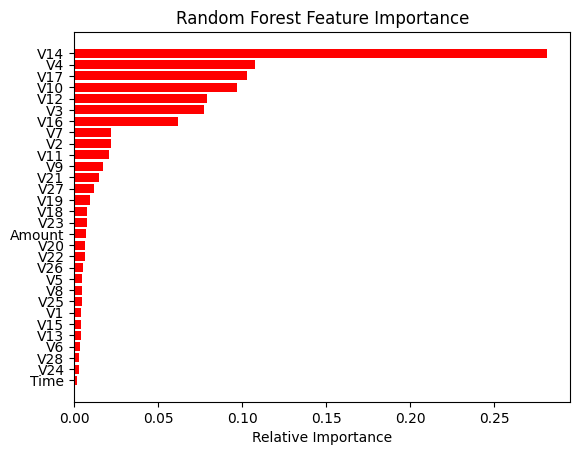

In [34]:
# Feature Importance Plot
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Random Forest Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [35]:
# Evaluate Random Forest on the entire dataset
final_rf_preds = classifier.predict(X)
print("\nRandom Forest Overall Accuracy:", accuracy_score(y, final_rf_preds))
print("Random Forest Overall ROC AUC Score:", roc_auc_score(y, final_rf_preds))
print("Random Forest Overall Recall Score:", recall_score(y, final_rf_preds))
print("Confusion Matrix for Random Forest Overall:")
print(confusion_matrix(y, final_rf_preds))



Random Forest Overall Accuracy: 0.9990378040785829
Random Forest Overall ROC AUC Score: 0.9541394570802909
Random Forest Overall Recall Score: 0.9090909090909091
Confusion Matrix for Random Forest Overall:
[[283023    230]
 [    43    430]]


# **Observations**


- **Data Inspection:** The dataset has 284,807 rows and 31 columns, with no missing values in any of the columns. The dataset consists of transaction details (such as Time, V1, V2, ..., V28) and a Class label that indicates whether the transaction was fraudulent (1) or not (0).
- **Class Imbalance:** The target variable Class shows a significant imbalance between fraudulent and non-fraudulent transactions. Fraudulent transactions are far less frequent compared to non-fraudulent transactions. This is a typical scenario in fraud detection problems, requiring specialized handling of class imbalance.

## **Data Preprocessing:**

- **Duplicates:** Duplicates were identified and removed from the dataset, reducing the dataset size slightly from 284,807 to 283,726 rows.
- **Outliers:** The decision was made not to remove outliers since doing so could disrupt the fraud pattern in the data. Instead, log transformation was applied to the columns (Time, Amount, and other variables) to reduce skewness.
- **Log Transformation:** The log transformation was applied to reduce skewness in the data, particularly for the Time and Amount columns, which typically have right-skewed distributions in financial datasets.

## **Modeling** 

## **Logistic Regression Model:**
A Logistic Regression model was trained using Stratified K-Fold cross-validation (5 splits). This ensured that each fold maintained the same class distribution as the original dataset, which is important for imbalanced classes.
- **Class Weighting:** The Logistic Regression model used class_weight='balanced' to account for class imbalance, ensuring that the model gives more importance to the minority (fraudulent) class.
The average ROC AUC score was 0.941 and the recall score was 0.913. The recall score is critical for fraud detection, as it measures the model's ability to correctly identify fraudulent transactions.
Confusion Matrix for Logistic Regression:

  The confusion matrix showed that the model was very effective in identifying non-fraudulent transactions, with 275,126 true negatives. However, it also misclassified 8,127 non-fraudulent transactions as fraudulent (false positives).
  For fraudulent transactions, the model correctly identified 436 true positives and missed 37 fraudulent transactions (false negatives). The recall for fraudulent transactions was high at 0.921.

## **Random Forest Model:**
- The Random Forest model was optimized using GridSearchCV for hyperparameter tuning, and the best model had the parameters class_weight='balanced', max_depth=7, and n_estimators=50.
The ROC AUC for the Random Forest model was 0.954 on the training data and 0.954 on the test data, indicating a consistent performance across both training and test sets.
- Recall was high at 0.909 for the entire dataset, and the confusion matrix showed that the Random Forest model was very effective at detecting fraudulent transactions with minimal false negatives and false positives.

## **Feature Importance:** 
- The Random Forest model's feature importance plot showed which features (variables) contributed most to predicting fraudulent transactions. This can be valuable for understanding which variables are most relevant for fraud detection.